In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

32k batch size
Min Train Loss: -1.7005846500396729
Min Valid Loss: -0.652183175086975
Avg Trace/s: 872.0646626888253


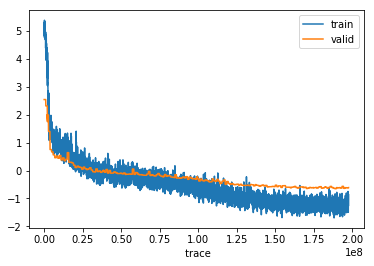

In [2]:
fig, ax = plt.subplots()
dir='/global/cscratch1/sd/wbhimji/etalumis_networks/Apr12-Runs/logs/'
#log_list = os.listdir(dir)
log_list = glob.glob(dir+"/train_loss_log*")   
log_list.sort(key=os.path.getmtime)
log_list
df_list=[]
for log in log_list:
    df_list.append(pd.read_csv(log))
df = pd.concat(df_list)
df[' valid_loss']=df[' valid_loss']*32
df.plot(' trace',' loss',ax=ax, label='train')
df.plot(' trace',' valid_loss',ax=ax, label='valid')
print("32k batch size")
print("Min Train Loss:", df[' loss'].min())
print("Min Valid Loss:", df[' valid_loss'].min())
print("Avg Trace/s:",df[' traces_per_second'].mean())
#ax.hlines(df[' loss'].min(), 0,df['trace1k'].max(),lw=2, color='r')

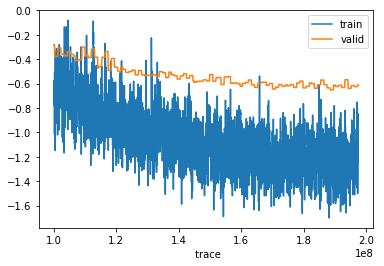

In [3]:
fig, ax = plt.subplots()
df[df[' trace']>1e8].plot(' trace',' loss', ax=ax,label='train')
df[df[' trace']>1e8].plot(' trace',' valid_loss', ax=ax,label='valid')
#df.plot(' trace',' valid_loss', label='valid')

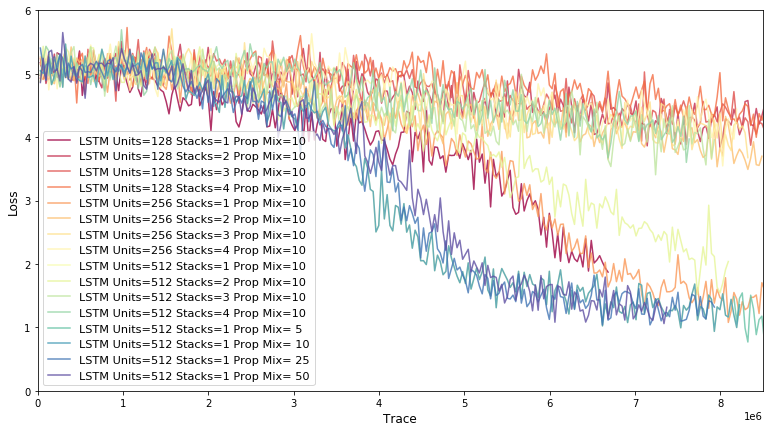

In [50]:
fig, ax = plt.subplots(figsize=(13, 7))
dir='/global/cscratch1/sd/wbhimji/etalumis_networks/Apr12-Runs/logs/hpo/'
#log_list = os.listdir(dir)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,16)))
df_list=[]
for j in [128,256,512]:
    for i in range(1,5):
        name = glob.glob(dir+"/train_loss_log*lstm_dim_" + str(j) + "_lstm_depth_"+ str(i) + '_prop_mix_10') 
        df = pd.read_csv(name[0])
    #    df.plot(' trace',' loss',ax=ax, label='train')
        df.plot(' trace',' loss',ax=ax, label="LSTM Units=" + str(j) +" Stacks=" + str(i) + " Prop Mix=10", alpha=0.8)
#ax.hlines(df[' loss'].min(), 0,df['trace1k'].max(),lw=2, color='r')
df_list=[]
for j in [5,10,25,50]:
    name = glob.glob(dir+"/train_loss_log*lstm_dim_512_lstm_depth_1_prop_mix_" + str(j))
    df = pd.read_csv(name[0])
#    df.plot(' trace',' loss',ax=ax, label='train')
    df.plot(' trace',' loss',ax=ax, label="LSTM Units=512 Stacks=1 Prop Mix= " + str(j), alpha=0.8)
    #ax.hlines(df[' loss'].min(), 0,df['trace1k'].max(),lw=2, color='r')
#LSTM stacksin range {1, 5}, LSTM hidden units in the set {128, 256, 512}, andnumber of proposal mixture components i
ax.set_ylabel('Loss',fontsize=12)
ax.set_xlabel('Trace',fontsize=12)
ax.legend(loc='lower left',fontsize=11.3)
ax.set_ylim(0,6)
ax.set_xlim(0,8.5e6)
#lgd = ax.legend(bbox_to_anchor=(1.01, 0.99), loc=2, fontsize='small')
#fig.tight_layout()
fig.savefig('arch_hpo.pdf')

In [5]:
df['time'].max()/(60*60)

3.967135209971004

128K Batch Size
Min Loss: 0.6882007122039795
Avg Trace/s: 1045.5017755408658
Total Trace/ Total time: 956.594049666018


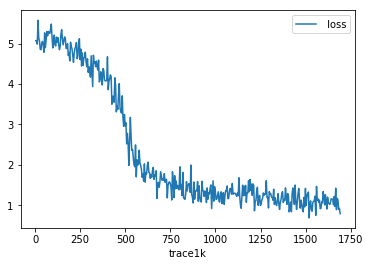

In [6]:
fig, ax = plt.subplots()
df = pd.read_csv('/global/cscratch1/sd/wbhimji/etalumis_networks/logs/train_loss_log_15Mdata_BZPT-64-Nodes-32-LR-12_converge-19917481')
df['trace1k']=df[' trace']/1000
df.plot('trace1k',' loss',ax=ax)
print("128K Batch Size")
print("Min Loss:", df[' loss'].min())
print("Avg Trace/s:",df[' traces_per_second'][-1:].mean())
print("Total Trace/ Total time:",df[' trace'].max()/df['time'].max())
#ax.hlines(df[' loss'].min(), 0,df['trace1k'].max(),lw=2, color='r')

Big Time run!
Min Loss: 0.07960397005081178
Avg Trace/s: 1331.5935449937294


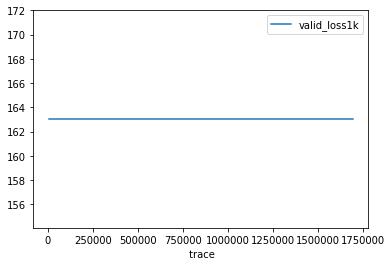

In [7]:
df['valid_loss1k']=df[' valid_loss']*2048
df.plot(' trace','valid_loss1k')
print("Big Time run!")
print("Min Loss:", df[' valid_loss'].min())
print("Avg Trace/s:",df[' traces_per_second'].mean())

Latest Code
Min Loss: 0.054673630744218826
Avg Trace/s: 4342.311395689078


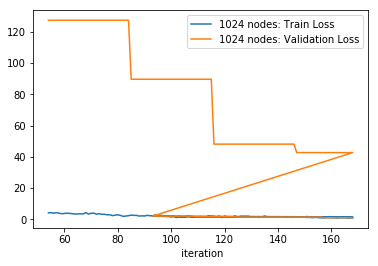

In [8]:
fig, ax = plt.subplots()
df1 = pd.read_csv('/global/cscratch1/sd/wbhimji/etalumis_networks/Apr12-Runs/logs/train_loss_log_15Mdata_BZPT-512-Nodes-32-LR-56_converge-20435382')
df2 = pd.read_csv('/global/cscratch1/sd/wbhimji/etalumis_networks/logs/train_loss_log_15Mdata_BZPT-64-Nodes-1024-LR-12_converge-19934289')
df = df1[:-30].append(df2)
df[' valid_loss_scaled']=2048*df[' valid_loss']
#df[df[' iteration'] < 169].plot(' iteration',' loss',ax=ax, label='1024 nodes')
df[df[' iteration'] < 169].plot(' iteration',' loss',ax=ax, label='1024 nodes: Train Loss')
df[df[' iteration'] < 169].plot(' iteration',' valid_loss_scaled',ax=ax, label='1024 nodes: Validation Loss')
#df3[df3[' iteration'] < 222].plot('time',' loss',ax=ax,label='64 nodes')
print("Latest Code")
print("Min Loss:", df[' loss'].min())
print("Avg Trace/s:",df[' traces_per_second'].mean())
fig.savefig('128kBatchSize.pdf')

In [9]:
df1 = pd.read_csv('/global/cscratch1/sd/wbhimji/etalumis_networks/logs/train_loss_log_15Mdata_BZPT-64-Nodes-1024-LR-12_converge-19932923')
df2 = pd.read_csv('/global/cscratch1/sd/wbhimji/etalumis_networks/logs/train_loss_log_15Mdata_BZPT-64-Nodes-1024-LR-12_converge-19934289')
df = df1[:-30].append(df2)

In [10]:
df[' valid_loss_scaled']=2048*df[' valid_loss']

In [11]:
df3 = pd.read_csv('/global/homes/w/wbhimji/train_loss_log_15Mdata_BZPT-1024-Nodes-64-LR-50_converge-19954882_adam_nodecay_GBZ128K_latestcode0323_part1')
df4 = pd.read_csv('train_loss_log_15Mdata_emu1K_BZPT256_Bucket1_adam_nodecay_nodes64_40_epoch1_3')

Latest Code
Min Loss: 0.5545571446418762
Avg Trace/s: 10453.283098203943


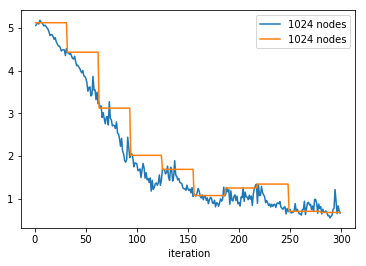

In [12]:
fig, ax = plt.subplots()
df = pd.read_csv('/global/cscratch1/sd/wbhimji/etalumis_networks/logs/train_loss_log_15Mdata_BZPT-16-Nodes-1020-LR-10_converge-19932047')
df.plot(' iteration',' loss',ax=ax, label='1024 nodes')
df[' valid_loss_scaled']=2048*df[' valid_loss']
df.plot(' iteration',' valid_loss_scaled',ax=ax, label='1024 nodes')
#df4[df4[' iteration'] < 198].plot('time',' loss',ax=ax,label='64 nodes')
print("Latest Code")
print("Min Loss:", df[' loss'].min())
print("Avg Trace/s:",df[' traces_per_second'].mean())

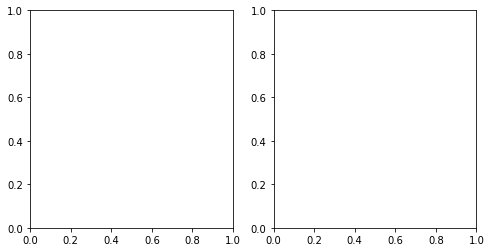

In [13]:
f = plt.figure()
f.set_size_inches(8,4)
ax1 = plt.subplot2grid((1,2), (0, 0))
ax2 = plt.subplot2grid((1,2), (0, 1))

In [14]:
df8 = pd.read_csv('/global/homes/w/wbhimji/train_loss_log_15Mdata_BZPT-1024-Nodes-64-LR-50_converge-19948016_128Kglobalbatchsize_larc_poly2_part1')
df9 = pd.read_csv('/global/homes/w/wbhimji/train_loss_log_15Mdata_BZPT-1024-Nodes-64-LR-50_converge-19953666_128kglobalbatchsize_larc_poly2_part2')
df8[' valid_loss'] = df8[' valid_loss']*128
df9[' valid_loss'] = df9[' valid_loss']*128
df10 = pd.read_csv('/global/cscratch1/sd/wbhimji/etalumis_networks/logs/train_loss_log_15Mdata_BZPT-64-Nodes-1024-LR-12_converge-12799648_larc_poly2')
df10[' valid_loss']=2048*df10[' valid_loss']
df = df8.append([df9,df10])
df.plot(' iteration',' loss',ax=ax1, label='Training')
df.plot(' iteration',' valid_loss',ax=ax1, label='Validation')
df11.plot(' iteration',' loss', ax=ax1,label='Training - rerun at 1024 node')
#df11.plot(' iteration',' valid_loss',ax=ax1 ,label='Valiidation')

#df4[df4[' iteration'] < 198].plot('time',' loss',ax=ax,label='64 nodes')
print("Latest Code")
print("Min Loss:", df[' loss'].min())
print("Avg Trace/s:",df[' traces_per_second'].mean())

NameError: name 'df11' is not defined

In [ ]:
df10 = pd.read_csv('/global/cscratch1/sd/wbhimji/etalumis_networks/logs/train_loss_log_15Mdata_BZPT-64-Nodes-1024-LR-12_converge-12799648_larc_poly2')
df10[' valid_loss']=2048*df10[' valid_loss']
df10.plot(' iteration',' loss',ax=ax2, label='Training')
df10.plot(' iteration',' valid_loss',ax=ax2, label='Valiidation')
#df4[df4[' iteration'] < 198].plot('time',' loss',ax=ax,label='64 nodes')
print("Latest Code")
print("Min Loss:", df[' loss'].min())
print("Avg Trace/s:",df[' traces_per_second'].mean())

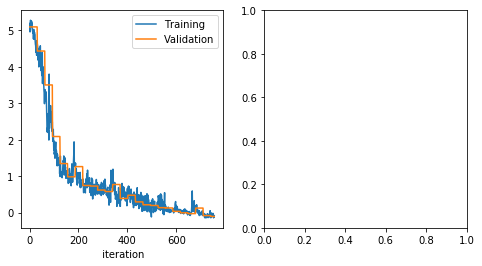

In [15]:
f

Latest Code
Min Loss: 0.5749302506446838
Avg Trace/s: 8567.214575017828


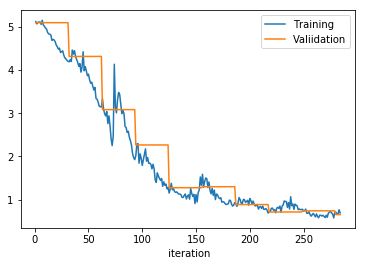

In [16]:
df11 = pd.read_csv('/global/cscratch1/sd/wbhimji/etalumis_networks/logs/train_loss_log_15Mdata_BZPT-64-Nodes-1024-LR-12_converge-12800178_larc_poly2')
fig, ax = plt.subplots()
df11[' valid_loss']=2048*df11[' valid_loss']
df11.plot(' iteration',' loss', ax=ax,label='Training')
df11.plot(' iteration',' valid_loss',ax=ax ,label='Valiidation')
#df4[df4[' iteration'] < 198].plot('time',' loss',ax=ax,label='64 nodes')
print("Latest Code")
print("Min Loss:", df11[' loss'].min())
print("Avg Trace/s:",df11[' traces_per_second'].mean())

Latest Code
Min Loss: -0.14710837602615354
Avg Trace/s: 4984.465197030334


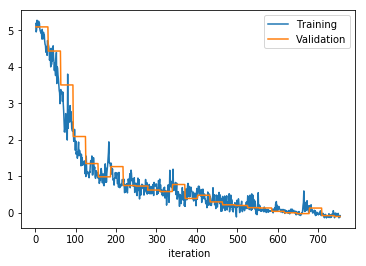

In [17]:
fig, ax = plt.subplots()
#df = df11.append([df9,df10])
df10 = pd.read_csv('/global/cscratch1/sd/wbhimji/etalumis_networks/logs/train_loss_log_15Mdata_BZPT-64-Nodes-1024-LR-12_converge-12799648_larc_poly2')
df10[' valid_loss']=2048*df10[' valid_loss']
df8 = pd.read_csv('/global/homes/w/wbhimji/train_loss_log_15Mdata_BZPT-1024-Nodes-64-LR-50_converge-19948016_128Kglobalbatchsize_larc_poly2_part1')
df9 = pd.read_csv('/global/homes/w/wbhimji/train_loss_log_15Mdata_BZPT-1024-Nodes-64-LR-50_converge-19953666_128kglobalbatchsize_larc_poly2_part2')
df8[' valid_loss'] = df8[' valid_loss']*128
df9[' valid_loss'] = df9[' valid_loss']*128
df = df8.append([df9,df10])
df.plot(' iteration',' loss',ax=ax, label='Training')
df.plot(' iteration',' valid_loss',ax=ax, label='Validation')
#df4[df4[' iteration'] < 198].plot('time',' loss',ax=ax,label='64 nodes')
print("Latest Code")
print("Min Loss:", df[' loss'].min())
print("Avg Trace/s:",df[' traces_per_second'].mean())
fig.savefig('./edison-1k.pdf')

Latest Code
Min Loss: -0.14710837602615354
Avg Trace/s: 4984.465197030334


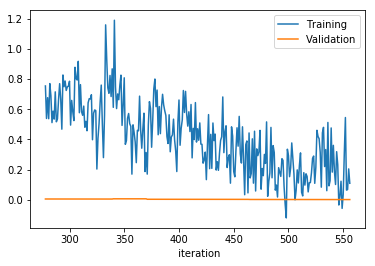

In [18]:
fig, ax = plt.subplots()
df9 = pd.read_csv('/global/homes/w/wbhimji/train_loss_log_15Mdata_BZPT-1024-Nodes-64-LR-50_converge-19953666_128kglobalbatchsize_larc_poly2_part2')
df9.plot(' iteration',' loss',ax=ax, label='Training')
df9.plot(' iteration',' valid_loss',ax=ax, label='Validation')
#df4[df4[' iteration'] < 198].plot('time',' loss',ax=ax,label='64 nodes')
print("Latest Code")
print("Min Loss:", df[' loss'].min())
print("Avg Trace/s:",df[' traces_per_second'].mean())

Latest Code
Min Loss: -0.12063483148813248
Avg Trace/s: 2991.0531059672635


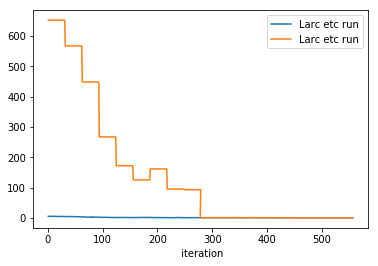

In [19]:
fig, ax = plt.subplots()
df = df8.append(df9)
df[' valid_loss'] = df[' valid_loss']*128
df.plot(' iteration',' loss',ax=ax, label='Larc etc run')
df.plot(' iteration',' valid_loss',ax=ax, label='Larc etc run')
print("Latest Code")
print("Min Loss:", df[' loss'].min())
print("Avg Trace/s:",df[' traces_per_second'].mean())

In [20]:
df[' valid_loss'] = df[' valid_loss']*128

Latest Code
Min Loss: -0.12063483148813248
Avg Trace/s: 2991.0531059672635


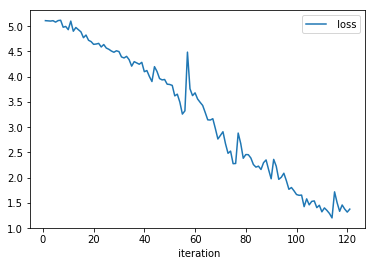

In [21]:
df1.plot(' iteration',' loss')
print("Latest Code")
print("Min Loss:", df[' loss'].min())
print("Avg Trace/s:",df[' traces_per_second'].mean())

In [22]:
df[df[' loss'] == df[' loss'].min()]

time   iteration     trace      loss   valid_loss   learning_rate  \
220  24591.97666         498  65273856 -0.120635    24.850357        0.000244   

      mean_trace_length_controlled   sub_mini_batches   distributed_bucket_id  \
220                           13.0                  1                       0   

      traces_per_second  
220         3454.523505

Latest Code
Min Valid Loss: 17.218006134033203


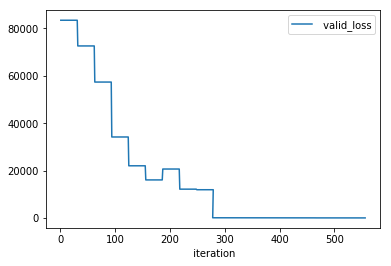

In [23]:
fig, ax = plt.subplots()
df.plot(' iteration',' valid_loss',ax=ax)
print("Latest Code")
print("Min Valid Loss:", df[' valid_loss'].min())

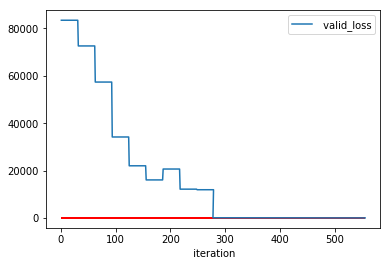

In [24]:
ax.hlines(df[' valid_loss'].min(), 0,df[' iteration'].max(),lw=2, color='r')
fig

26.482526909208584

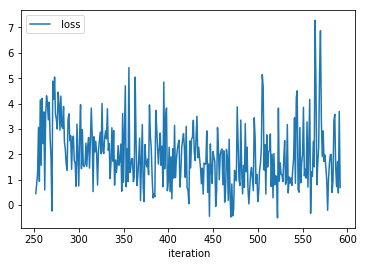

In [25]:
df = pd.read_csv('/global/homes/w/wbhimji/etalumis_submitdir/train-log-notlarry-12632305-1-64')
df.plot(' iteration',' loss')
df[' loss'].min()
df[' traces_per_second'].mean()

-0.3895338177680969

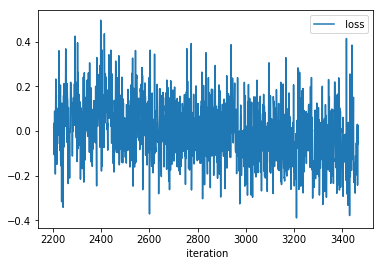

In [26]:
df2 = pd.read_csv('/global/homes/w/wbhimji/etalumis_submitdir/train-log-19601318-16')
#df3 = df.append(df2)
df2.plot(' iteration',' loss')
df2[' loss'].min()

In [27]:
df[' traces_per_second'].mean()

26.482526909208584

-0.5393782258033752

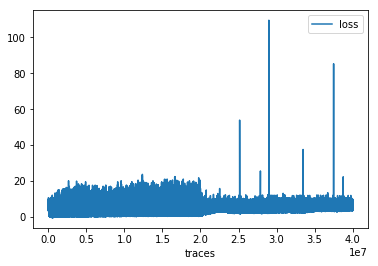

In [28]:
import pandas as pd
df = pd.read_csv('/global/cscratch1/sd/wbhimji/etalumis_data_dec7_2018/train_loss_mar8gpu.csv')
df.plot('traces','loss')
df['loss'].min()

In [29]:
df.plot('traces','train_loss')

KeyError: 'train_loss'

In [ ]:
df['train_loss'].min()

In [ ]:
import sys
sys.path.append('/global/project/projectdirs/dasrepo/etalumis/pyprob_distributed/')
sys.path.append('/global/project/projectdirs/dasrepo/etalumis/pytorch_intel_3.7_larry_install/')
import pyprob
import pandas as pd

# specify path to ".network" file
network_file = "/global/cscratch1/sd/wbhimji/etalumis_data_dec7_2018/networks2/sherpa_tau_decay_20181221_163632_traces_19933825.network"
output_file_valid = "/global/cscratch1/sd/wbhimji/etalumis_data_dec7_2018/valid_loss.csv"
output_file_train = "/global/cscratch1/sd/wbhimji/etalumis_data_dec7_2018/train_loss.csv"

# load network
inference_network = pyprob.nn.InferenceNetworkFeedForward._load(network_file)

# get the training and validation loss as numpy datastructures
train_loss = inference_network._history_train_loss
n_traces_train = inference_network._history_train_loss_trace
valid_loss = inference_network._history_valid_loss
n_traces = inference_network._history_valid_loss_trace

d = {"traces": n_traces, "val_loss": valid_loss}
df = pd.DataFrame(data=d)

df.to_csv(output_file_valid, sep=",", index=False)

d = {"traces": n_traces_train, "train_loss": train_loss}
df = pd.DataFrame(data=d)

df.to_csv(output_file_train, sep=",", index=False)
